# Model Execution

## The Solution

Overall, this solution is designed to classify cases of fraudulent and non-fraudulent behaviour.

There are three models within this solution:

- One Extra Trees model, with cross-validation and RFE, in this notebook.
- One Baseline Sequential model written in Keras, in the keras_modelworkflow notebook
- One Sequential model with hyperparameter optimization, in the keras_modelworkflow notebook.



The structure of this code solution is as follows:


## The Script


This script runs the sklearn model by doing the following:

1. Read in model and feature prep code
2. Initialize a model
3. Run that model to generate results.


I implemented an extra trees classifier, and employed cross-validation and recursive feature elimination approaches.

One objective of this work was to quickly identify feature effectiveness.

In [83]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier as etc
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy
from numpy.random import standard_normal
import inputparser
# fix random seed for reproducibility
numpy.random.seed(7)

Here we take advantage of our helper functionality to load in our dataset.

In [85]:

traffic = inputparser.csv_reader('traffic.csv')
traffic = traffic.dropna()
#traffic = traffic[traffic['number_of_mouse_clicks']==True]
print(traffic.shape)
Y = traffic[['is_fraud']]
x = inputparser.x_maker(traffic)
x


(23085, 26)


array([[ 4.97651131e+01, -1.53425244e+00, -1.44098426e+00, ...,
        -1.44241302e+00, -9.27206701e-01,  9.86627740e-04],
       [ 9.33895711e-01, -1.54648419e+00, -1.43780309e+00, ...,
        -1.37054006e+00,  2.86274562e-01, -9.56412845e-02],
       [-1.75904685e-01, -1.50367307e+00, -1.42507843e+00, ...,
         3.84005693e-01, -6.47786672e-01,  1.59023457e-02],
       ...,
       [-1.75904685e-01, -5.00669774e-01, -6.96591778e-01, ...,
        -1.57683885e-01, -1.22165436e+00, -7.11974074e-03],
       [-1.75904685e-01, -3.35541182e-01, -2.92583896e-01, ...,
         1.29632498e+00,  2.86274562e-01, -4.44090357e-02],
       [-1.28570508e+00, -6.90261861e-01, -6.64780134e-01, ...,
         9.65331095e-01, -7.57676228e-01, -2.36567324e-02]])

In [86]:
Y = Y.values.ravel()
Y

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
%%time

clf = etc(n_estimators = 240, random_state = 0)
#rfe = RFE(estimator=clf, n_features_to_select=1, step=1)
rfecv = RFECV(estimator=clf, step=0.1, cv=StratifiedKFold(2), n_jobs=4,
              scoring='accuracy', verbose = 2)

rfecv.fit(x, Y)

Fitting estimator with 22 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Fitting estimator with 4 features.
Fitting estimator with 2 features.
Fitting estimator with 2 features.
CPU times: user 1min 3s, sys: 156 ms, total: 1min 3s
Wall time: 1min 43s


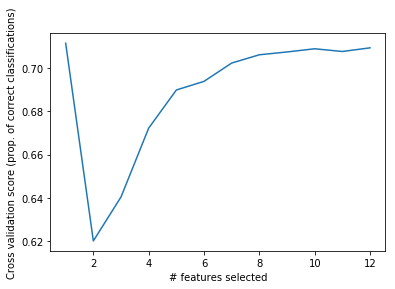

In [91]:
plt.figure()
plt.xlabel("# features selected")
plt.ylabel("Cross validation score (prop. of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [92]:
rfecv.ranking_

array([12,  7,  3,  1,  7,  3,  4, 12, 10,  8,  9,  6,  8,  6, 11,  2,  4,
       10,  5,  5, 11,  9])

In [87]:
%%time
clf.fit(x, Y)
importances = clf.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]

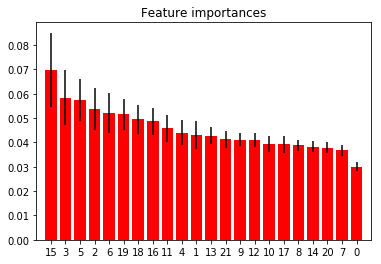

In [88]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [89]:
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 15 (0.069702)
2. feature 3 (0.058424)
3. feature 5 (0.057352)
4. feature 2 (0.053588)
5. feature 6 (0.052174)
6. feature 19 (0.051583)
7. feature 18 (0.049457)
8. feature 16 (0.048598)
9. feature 11 (0.045744)
10. feature 4 (0.044035)
11. feature 1 (0.043197)
12. feature 13 (0.042687)
13. feature 21 (0.041264)
14. feature 9 (0.041070)
15. feature 12 (0.041010)
16. feature 10 (0.039339)
17. feature 17 (0.039216)
18. feature 8 (0.038735)
19. feature 14 (0.038200)
20. feature 20 (0.037792)
21. feature 7 (0.036774)
22. feature 0 (0.030058)
